In [1]:
import csv
import json
import requests
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import seaborn as sb
# from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from re import X
from pandas_datareader import data as pdr 
from datetime import datetime, timedelta
from functools import reduce
import yahoo_fin.stock_info as si 
from yahoo_fin import *
import tradingview_ta
import warnings
from tradingview_ta import TA_Handler, Interval, Exchange
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pypfopt import EfficientFrontier, EfficientCVaR, plotting, risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation, get_latest_prices
plt.style.use('bmh')
warnings.filterwarnings('ignore')

W – means there are outstanding warrants.
R – means there is some kind of “rights” issue.
P – means “First Preferred Issue”. Preferred stocks are separate entity.
Q - means bankruptcy.

In [6]:
# deleting stock symbols/tickers within the nasdaq listing
nasdaq = pd.DataFrame(si.tickers_nasdaq())
sym = set( symbol for symbol in nasdaq[0].values.tolist() )

# deleting the inactive tickers by suffix
my_list = ['W', 'R', 'P', 'Q']

# variable for tickers to be saved and disgarded
del_set = set()
sav_set = set()

# loop to id the suffix and disgard
for symbol in sym:
    if len(symbol) > 4 and symbol[-1] in my_list:
        del_set.add(symbol)
    else:
        sav_set.add(symbol)

tickers = sorted(sav_set)
# # creates a csv file with the tickers in the save list
# with open('symbols.csv', 'w', newline = '') as f:
#     fieldnames = ['Ticker']
#     writer = csv.DictWriter(f, fieldnames=fieldnames)
#     writer.writeheader()
#     for ticker in sav_set:
#         writer.writerow({'Ticker': ticker})

In [ ]:
# # Nasdaq symbol listing
# symbols = si.tickers_nasdaq()

# # Alpha Vantage API key
# api_key = '7FJJGJH1X7SX6JTK'

# # Date range (30 days before today's date)
# end_date = datetime.today().strftime('%Y-%m-%d')
# start_date = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')

# # create empty list to store historical data for each stock
# historical_data = []

# # loop through symbols and get historical data
# for symbol in tickers:
#     url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={api_key}&datatype=csv&start={start_date}&end={end_date}'
#     response = requests.get(url)
#     if response.status_code == 200:
#         data = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
#         data = data.rename(columns={'5. adjusted_close': symbol})
#         historical_data.append(data)
#     else:
#         print(f'Error: {response.status_code}')

# # create dataframe from list of historical data
# prices = pd.concat(historical_data)
# prices

In [ ]:
yf.pdr_override

# date variable to got back one month to today's date
begin = (dt.datetime.today() - dt.timedelta(30)).strftime('%Y-%m-%d')
end = dt.datetime.today().strftime('%Y-%m-%d')

# creates the dataframe for the symbols and adjusted close prices
prices = pd.DataFrame()
for stock in tickers:
  prices[stock] = yf.download(stock, start = begin, end = end)['Adj Close']

# show dataframe
prices  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ZXYZ.A: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']
C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMLI: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CCLDO: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ZXZZT: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']



[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DHCNL: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ZBZZT: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LIFWZ: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ZVZZT: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- WHLRL: No data found for this date range, symbol may be delisted


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_27256\2935651657.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prices[stock] = yf.download(stock, start = begin, end = stop)['Adj Close']


[*********************100%***********************]  1 of 1 completed

In [2]:
# creating a csv file of the DataFrame
# prices.to_csv('prices.csv', header=True, index=True, encoding='utf-8')
# prices

NameError: name 'prices' is not defined

In [3]:
prices = pd.read_csv('prices.csv', index_col=0)
prices = pd.DataFrame(prices)
prices

,SPWH,IXHL,OPTN,TDSE,RSLS,MRBK,SEDG,NTGR,STX,CRAI,...,IPAR,ACAH,PSCH,BCSAU,JSMD,CGC,NAMS,LQDT,FEMY,BFRI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-12,9.62,3.390,1.75,22.608932,7.95,33.000000,314.910004,20.820000,54.856438,113.809998,...,96.114403,9.960,136.539993,10.20,54.193203,2.96,10.000,12.93,1.080,0.948
2022-12-13,9.57,3.230,1.90,22.829929,7.70,33.299999,327.640015,20.670000,55.398884,114.349998,...,95.050003,9.965,137.380005,10.20,54.530647,2.91,10.000,13.37,1.085,0.900
2022-12-14,9.68,3.250,1.84,22.681940,8.85,31.740000,335.609985,20.290001,53.998383,116.500000,...,95.019997,9.980,137.089996,10.20,54.188210,2.84,9.415,13.24,1.030,0.890
2022-12-15,9.32,3.367,1.75,22.050516,7.50,30.719999,327.309998,19.170000,51.651054,113.220001,...,93.250000,9.960,133.440002,10.27,52.639751,2.61,12.000,12.79,1.032,0.890
2022-12-16,9.33,3.255,1.70,21.813732,6.50,29.620001,320.529999,18.799999,51.414349,113.980003,...,92.370003,9.960,133.059998,10.27,52.124592,2.60,10.715,13.23,1.120,0.790
2022-12-19,9.02,3.255,1.70,21.695339,6.40,29.500000,309.579987,18.510000,50.290001,114.000000,...,93.660004,9.960,131.539993,10.27,51.265999,2.41,11.310,13.25,1.130,0.800
2022-12-20,8.89,2.860,1.69,21.665741,6.40,30.110001,309.899994,18.600000,51.009998,117.169998,...,93.360001,9.960,131.479996,10.23,51.576000,2.37,11.170,13.73,1.010,0.770
2022-12-21,9.02,2.976,1.69,21.802881,5.45,30.270000,323.160004,18.459999,50.240002,119.320000,...,96.669998,9.960,133.440002,10.23,52.450001,2.41,11.450,14.08,1.040,0.923
2022-12-22,8.92,2.735,1.69,21.716059,5.75,30.320000,311.459991,17.990000,50.209999,119.050003,...,96.470001,9.970,132.860001,10.27,52.000000,2.29,11.250,13.84,1.020,0.940


In [4]:
# drop na or missing values 
prices.dropna(inplace = True, axis = 1)

In [5]:
# calculate the Simple Returns
daily_simple_returns = prices.pct_change()
daily_simple_returns

,SPWH,IXHL,OPTN,TDSE,RSLS,MRBK,SEDG,NTGR,STX,CRAI,...,IPAR,ACAH,PSCH,BCSAU,JSMD,CGC,NAMS,LQDT,FEMY,BFRI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-13,-0.005198,-0.047198,0.085714,0.009775,-0.031447,0.009091,0.040424,-0.007205,0.009888,0.004745,...,-0.011074,0.000502,0.006152,0.000000,0.006227,-0.016892,0.000000,0.034029,0.004630,-0.050633
2022-12-14,0.011494,0.006192,-0.031579,-0.006482,0.149351,-0.046847,0.024325,-0.018384,-0.025280,0.018802,...,-0.000316,0.001505,-0.002111,0.000000,-0.006280,-0.024055,-0.058500,-0.009723,-0.050691,-0.011111
2022-12-15,-0.037190,0.036000,-0.048913,-0.027838,-0.152542,-0.032136,-0.024731,-0.055200,-0.043470,-0.028154,...,-0.018628,-0.002004,-0.026625,0.006863,-0.028576,-0.080986,0.274562,-0.033988,0.001942,0.000000
2022-12-16,0.001073,-0.033264,-0.028571,-0.010738,-0.133333,-0.035807,-0.020714,-0.019301,-0.004583,0.006713,...,-0.009437,0.000000,-0.002848,0.000000,-0.009787,-0.003831,-0.107083,0.034402,0.085271,-0.112360
2022-12-19,-0.033226,0.000000,0.000000,-0.005427,-0.015385,-0.004051,-0.034162,-0.015425,-0.021868,0.000175,...,0.013966,0.000000,-0.011423,0.000000,-0.016472,-0.073077,0.055530,0.001512,0.008929,0.012658
2022-12-20,-0.014412,-0.121352,-0.005882,-0.001364,0.000000,0.020678,0.001034,0.004862,0.014317,0.027807,...,-0.003203,0.000000,-0.000456,-0.003895,0.006047,-0.016598,-0.012378,0.036226,-0.106195,-0.037500
2022-12-21,0.014623,0.040560,0.000000,0.006330,-0.148438,0.005314,0.042788,-0.007527,-0.015095,0.018349,...,0.035454,0.000000,0.014907,0.000000,0.016946,0.016878,0.025067,0.025492,0.029703,0.198701
2022-12-22,-0.011087,-0.080981,0.000000,-0.003982,0.055046,0.001652,-0.036205,-0.025460,-0.000597,-0.002263,...,-0.002069,0.001004,-0.004347,0.003910,-0.008580,-0.049793,-0.017467,-0.017045,-0.019231,0.018418


In [6]:
# create and show annualized covariance matrix
cov_matrix_annual = daily_simple_returns.cov() * 252
cov_matrix_annual

,SPWH,IXHL,OPTN,TDSE,RSLS,MRBK,SEDG,NTGR,STX,CRAI,...,IPAR,ACAH,PSCH,BCSAU,JSMD,CGC,NAMS,LQDT,FEMY,BFRI
SPWH,0.133775,0.024262,0.070519,0.020379,-0.707695,0.022046,0.058430,0.062021,0.055237,0.032472,...,0.044104,0.001797,0.038894,-0.003991,0.040738,0.166102,-0.089445,0.014147,0.013020,0.066349
IXHL,0.024262,0.821186,-0.040706,-0.009804,1.511266,-0.009815,0.128628,0.034788,-0.068267,-0.019003,...,-0.065837,-0.001396,0.008408,0.000641,0.030417,0.067079,0.442425,-0.086895,0.365515,0.091438
OPTN,0.070519,-0.040706,0.473422,0.045689,-0.158808,0.097859,0.111058,0.077221,0.139130,0.087598,...,0.001811,0.000201,0.094219,-0.007566,0.088762,0.198701,-0.156348,0.128168,-0.321983,-0.074539
TDSE,0.020379,-0.009804,0.045689,0.016479,0.107750,0.021735,0.028028,0.028062,0.025890,0.011596,...,0.019715,0.001033,0.016323,-0.002488,0.020096,0.042344,-0.084611,0.024655,-0.009294,0.032849
RSLS,-0.707695,1.511266,-0.158808,0.107750,31.036223,0.047212,0.197204,0.277621,-0.234067,0.102368,...,-0.015777,0.014773,-0.075013,0.018787,-0.040143,-0.069091,-0.980734,0.071531,-0.851490,-1.896438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGC,0.166102,0.067079,0.198701,0.042344,-0.069091,0.063719,0.181427,0.147346,0.039026,0.033365,...,-0.048634,0.002488,0.088487,-0.014056,0.106855,0.572649,-0.339058,0.051673,-0.050129,0.302861
NAMS,-0.089445,0.442425,-0.156348,-0.084611,-0.980734,-0.021458,-0.005283,-0.153357,-0.173359,-0.115385,...,-0.046681,-0.012226,-0.092509,0.024594,-0.105268,-0.339058,1.723411,-0.206262,0.094930,0.099424
LQDT,0.014147,-0.086895,0.128168,0.024655,0.071531,0.026282,0.072367,0.041197,0.072593,0.052056,...,0.049379,0.000253,0.043144,-0.006331,0.046417,0.051673,-0.206262,0.125343,-0.083040,-0.076450
FEMY,0.013020,0.365515,-0.321983,-0.009294,-0.851490,0.040221,0.088946,0.097004,-0.011803,-0.165185,...,0.034642,-0.004654,-0.007992,0.006250,0.034268,-0.050129,0.094930,-0.083040,1.414020,0.265684


In [ ]:
# corr = cov_matrix_annual.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sb.axes_style('dark'):
#     f, ax = plt.subplots(figsize=(15,6))
#     ax = sb.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True, cmap = 'RdYlGn')

In [7]:
# optimize the portfolio
# calculate the expected returns & the ann sample covariance matrix of (daily) asset returns
mu = expected_returns.capm_return(prices)
print(f'Expected returns for each stock: {mu} \n')

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()


Expected returns for each stock: SPWH    0.821337
IXHL    0.646203
OPTN    1.155701
TDSE    0.281959
RSLS    1.182282
          ...   
CGC     2.263830
NAMS   -1.483295
LQDT    0.623851
FEMY    1.024184
BFRI    0.962337
Name: mkt, Length: 4681, dtype: float64 



Portfolio weight for min volatility optimization (lowest level of risk): {
    "AACG": 0.00023,
    "AACI": 0.00033,
    "AACIU": 0.00035,
    "AADI": 0.00012,
    "AADR": 0.00026,
    "AAL": 0.0,
    "AAME": 0.00034,
    "AAOI": 0.0,
    "AAON": 0.00027,
    "AAPB": 0.0,
    "AAPD": 0.00054,
    "AAPL": 0.00013,
    "AAPU": 0.0,
    "AAWW": 0.00034,
    "AAXJ": 0.00022,
    "ABCB": 0.00024,
    "ABCL": 0.00026,
    "ABCM": 0.00021,
    "ABEO": 0.0,
    "ABGI": 0.00034,
    "ABIO": 0.00025,
    "ABNB": 0.00014,
    "ABOS": 0.0,
    "ABSI": 0.0,
    "ABST": 0.00022,
    "ABUS": 0.0,
    "ABVC": 0.00043,
    "ACAB": 0.00033,
    "ACABU": 0.00031,
    "ACAC": 0.00034,
    "ACACU": 0.00032,
    "ACAD": 0.00016,
    "ACAH": 0.00033,
    "ACAHU": 0.00033,
    "ACAX": 0.00033,
    "ACAXU": 0.00033,
    "ACB": 0.0,
    "ACBA": 0.00029,
    "ACBAU": 0.00034,
    "ACCD": 0.0,
    "ACDC": 0.00027,
    "ACER": 0.0,
    "ACET": 0.00014,
    "ACGL": 0.0003,
    "ACGLN": 0.00026,
    "ACGLO": 0.00021

InstantiationError: The objective function was changed after the initial optimization. Please create a new instance instead.

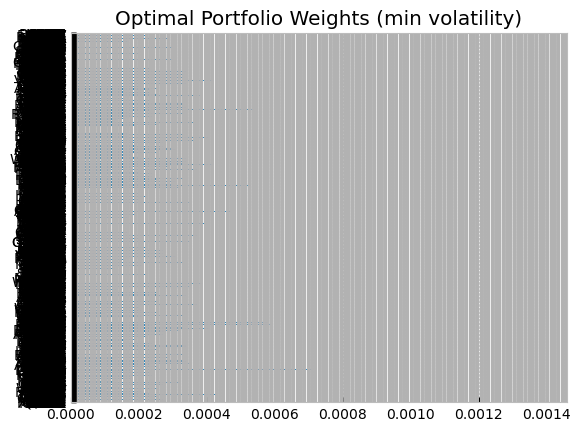

In [8]:
# optimizing to find the lowest and highest volitility
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))

# calculating the lowest volitility for the lowest level of risk
ef.min_volatility()
weights_mv = ef.clean_weights()

print(f'Portfolio weight for min volatility optimization (lowest level of risk): {json.dumps(weights_mv, indent=4, sort_keys=True)} \n')
print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.01305)} \n')

# visualization of the minimal volitility
pd.Series(weights_mv).plot.barh(title = 'Optimal Portfolio Weights (min volatility)');

# calculating the max ratio for the highest return per risk
ef.max_sharpe()
weights_max = ef.clean_weights()

print(f'Portfolio weight for max Sharpe optimization (highest return-per-risk): {json.dumps(weights_mv, indent=4, sort_keys=True)} \n')
print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.01305)} \n')

In [9]:
# calculating the expected returns
returns = expected_returns.returns_from_prices(prices)
returns.head()

,SPWH,IXHL,OPTN,TDSE,RSLS,MRBK,SEDG,NTGR,STX,CRAI,...,IPAR,ACAH,PSCH,BCSAU,JSMD,CGC,NAMS,LQDT,FEMY,BFRI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-13,-0.005198,-0.047198,0.085714,0.009775,-0.031447,0.009091,0.040424,-0.007205,0.009888,0.004745,...,-0.011074,0.000502,0.006152,0.000000,0.006227,-0.016892,0.000000,0.034029,0.004630,-0.050633
2022-12-14,0.011494,0.006192,-0.031579,-0.006482,0.149351,-0.046847,0.024325,-0.018384,-0.025280,0.018802,...,-0.000316,0.001505,-0.002111,0.000000,-0.006280,-0.024055,-0.058500,-0.009723,-0.050691,-0.011111
2022-12-15,-0.037190,0.036000,-0.048913,-0.027838,-0.152542,-0.032136,-0.024731,-0.055200,-0.043470,-0.028154,...,-0.018628,-0.002004,-0.026625,0.006863,-0.028576,-0.080986,0.274562,-0.033988,0.001942,0.000000
2022-12-16,0.001073,-0.033264,-0.028571,-0.010738,-0.133333,-0.035807,-0.020714,-0.019301,-0.004583,0.006713,...,-0.009437,0.000000,-0.002848,0.000000,-0.009787,-0.003831,-0.107083,0.034402,0.085271,-0.112360
2022-12-19,-0.033226,0.000000,0.000000,-0.005427,-0.015385,-0.004051,-0.034162,-0.015425,-0.021868,0.000175,...,0.013966,0.000000,-0.011423,0.000000,-0.016472,-0.073077,0.055530,0.001512,0.008929,0.012658


In [10]:
# visualizing the expected returns
weights_arr = ef.weights
portfolio_rets = {returns * weights_arr}.sum(axis = 1)
portfolio_rets.hist(bins=50)

TypeError: unhashable type: 'DataFrame'

In [11]:
# Calculating the average portfolio losses
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()

print('VaR: {:.2f%}'.format(100*var))
print('CVaR: {:.2f%}'.format(100*cvar))

NameError: name 'portfolio_rets' is not defined

In [12]:
# minimizing the calculated losses
ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True)

Expected annual return: 5.4%
Conditional Value at Risk: -8.54%


(0.05439707112087069, -0.08543200830398198)

In [18]:
# Discrete Allocation
Investment = input()
# calculating the sharpe weights to the last day of adjusted close for each ticker
prices_ld = prices.iloc[-1]
prices_ld['max_sharpe_weight'] = prices_ld.apply(lambda x: weights_max_sharpe[x])

# allocating your investment
prices_ld['stock_investment_amount'] = Investment * prices_ld['max_sharpe_weight'] / prices_ld

print(prices_ld[['Date','Adjusted Close','max_sharpe_weight','Investment Amount']])

 100


NameError: name 'weights_max_sharpe' is not defined

In [ ]:
# stock options based on the amount of investment chosen
latest_prices = prices.iloc[-1]
da = DiscreteAllocation(weights_max_sharpe, latest_prices, total_portfolio_value = Investment, short_ratio = 0.0)
alloc, leftover = da.lp_portfolio()

print(f'Discrete allocation for the initial investment ${Investment} performed with ${leftover:.2f} leftover')
alloc

In [27]:
yf.pdr_override()

# creating the date variable going back one month to date
begin = (dt.datetime.today() - dt.timedelta(365)).strftime('%Y-%m-%d')
stop = dt.datetime.today().strftime('%Y-%m-%d')

# choose a stock symbol of your choice based on the previous predictions
ticker = input(str())
df = pdr.get_data_yahoo(ticker, start=begin, end=stop)

# show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,21.809999,22.280001,21.610001,21.820000,21.470093,6321200
2022-01-04,22.000000,22.780001,21.840000,22.410000,22.050632,6574100
2022-01-05,22.910000,23.299999,21.680000,21.690001,21.342178,4995100
2022-01-06,22.190001,22.320000,21.469999,21.780001,21.430735,4040600
2022-01-07,22.059999,22.820000,22.049999,22.809999,22.444218,6050900
...,...,...,...,...,...,...
2022-12-23,35.230000,36.230000,34.639999,36.209999,36.209999,4191500
2022-12-27,36.500000,37.020000,36.060001,36.340000,36.340000,4243400
2022-12-28,35.889999,35.889999,33.410000,33.500000,33.500000,5874100


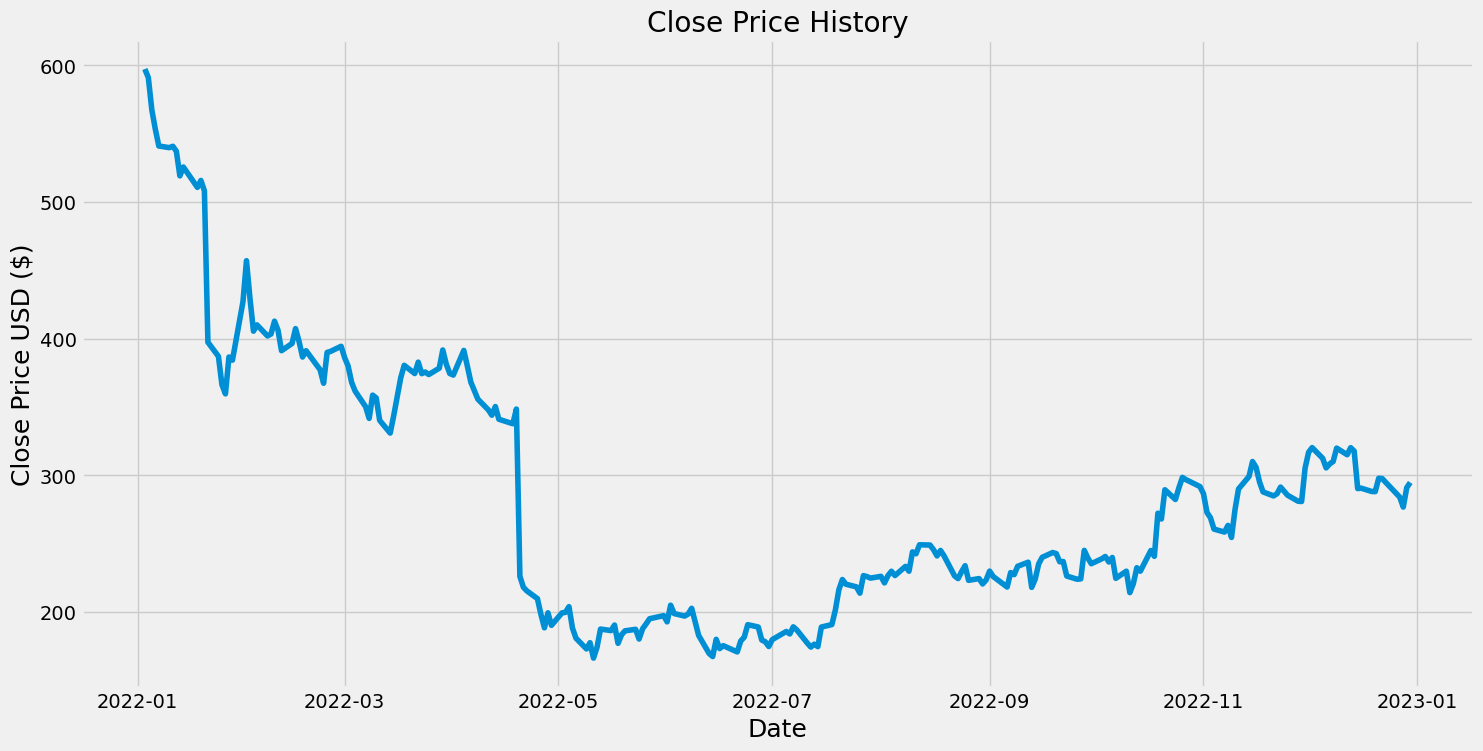

In [3]:
# visualize the closing price data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [4]:
# create a new dataframe with only the close column
data = df[['Close']]
data.head()

,Close
Date,
2022-01-03,597.369995
2022-01-04,591.150024
2022-01-05,567.520020
2022-01-06,553.289978
2022-01-07,541.059998


In [5]:
# create a variable to predict 'x' days out into the future
future = 25

# create a new column (target) shifted 'x' units/days up
data['Prediction'] = data[['Close']].shift(-future)
data.tail(4)

C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_81152\1846422985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data[['Close']].shift(-future)


,Close,Prediction
Date,,
2022-12-27,284.170013,NaN
2022-12-28,276.880005,NaN
2022-12-29,291.119995,NaN
2022-12-30,294.880005,NaN


In [6]:
# create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(data.drop(['Prediction'], 1))[: -future]
print(x)

C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_81152\2669221274.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(['Prediction'], 1))[: -future]


[[597.36999512]
 [591.15002441]
 [567.52001953]
 [553.28997803]
 [541.05999756]
 [539.84997559]
 [540.84002686]
 [537.2199707 ]
 [519.20001221]
 [525.69000244]
 [510.79998779]
 [515.85998535]
 [508.25      ]
 [397.5       ]
 [387.1499939 ]
 [366.42001343]
 [359.70001221]
 [386.70001221]
 [384.35998535]
 [427.14001465]
 [457.13000488]
 [429.48001099]
 [405.6000061 ]
 [410.17001343]
 [402.1000061 ]
 [403.52999878]
 [412.89001465]
 [406.26998901]
 [391.30999756]
 [396.57000732]
 [407.45999146]
 [398.07998657]
 [386.67001343]
 [391.29000854]
 [377.38000488]
 [367.45999146]
 [390.02999878]
 [390.79998779]
 [394.51998901]
 [386.23999023]
 [380.02999878]
 [368.07000732]
 [361.73001099]
 [350.26000977]
 [341.76000977]
 [358.79000854]
 [356.76998901]
 [340.32000732]
 [331.01000977]
 [343.75      ]
 [357.52999878]
 [371.3999939 ]
 [380.6000061 ]
 [374.58999634]
 [382.92001343]
 [374.48999023]
 [375.70999146]
 [373.8500061 ]
 [378.51000977]
 [391.82000732]
 [381.47000122]
 [374.58999634]
 [373.47

In [7]:
# create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' days
y = np.array(data['Prediction'])[:-future]
print(y)

[403.52999878 412.89001465 406.26998901 391.30999756 396.57000732
 407.45999146 398.07998657 386.67001343 391.29000854 377.38000488
 367.45999146 390.02999878 390.79998779 394.51998901 386.23999023
 380.02999878 368.07000732 361.73001099 350.26000977 341.76000977
 358.79000854 356.76998901 340.32000732 331.01000977 343.75
 357.52999878 371.3999939  380.6000061  374.58999634 382.92001343
 374.48999023 375.70999146 373.8500061  378.51000977 391.82000732
 381.47000122 374.58999634 373.47000122 391.5        380.1499939
 368.3500061  362.1499939  355.88000488 348.         344.1000061
 350.42999268 341.13000488 337.85998535 348.60998535 226.19000244
 218.22000122 215.52000427 209.91000366 198.3999939  188.53999329
 199.52000427 190.36000061 199.46000671 199.86999512 204.00999451
 188.32000732 180.97000122 173.1000061  177.66000366 166.36999512
 174.30999756 187.63999939 186.50999451 190.55999756 177.19000244
 183.47999573 186.3500061  187.44000244 180.33999634 187.83000183
 191.3999939  195.

In [8]:
# split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [9]:
# create the models
# create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [10]:
# retrieving the last 'x' rows of the feature data set
x_future = data.drop(['Prediction'], 1)[:-future]
x_future = x_future.tail(future)
x_future = np.array(x_future)
x_future

C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_81152\1579704212.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = data.drop(['Prediction'], 1)[:-future]


array([[268.16000366],
       [289.57000732],
       [282.45001221],
       [291.01998901],
       [298.61999512],
       [296.94000244],
       [295.72000122],
       [291.88000488],
       [286.75      ],
       [273.        ],
       [269.05999756],
       [260.79000854],
       [258.6000061 ],
       [263.45999146],
       [254.66000366],
       [274.97000122],
       [290.13000488],
       [299.26998901],
       [310.20001221],
       [306.01998901],
       [295.27999878],
       [287.98001099],
       [285.04998779],
       [286.69000244],
       [291.5       ]])

In [12]:
# show the model tree prediction
tree_pred = tree.predict(x_future)
print(tree_pred)
print()
# show the model linear regression prediction
lr_pred = lr.predict(x_future)
print(lr_pred)

[285.54000854 281.17001343 280.95999146 294.88000488 316.95001221
 312.58999634 312.58999634 305.55999756 291.11999512 310.26000977
 285.54000854 315.17999268 320.33999634 317.82998657 320.33999634
 290.70999146 288.29998779 288.19000244 297.95999146 297.75
 294.95999146 284.17001343 276.88000488 291.11999512 294.88000488]

[254.26362666 264.25300022 260.93098813 264.9295255  268.47549874
 267.69165607 267.12243394 265.33078745 262.93725516 256.5218482
 254.68354136 250.82497081 249.8031703  252.07071822 247.96486346
 257.44100162 264.51428111 268.77876968 273.87844581 271.92815128
 266.91713978 263.5111476  262.14407187 262.90926179 265.15348665]


C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_81152\476167699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


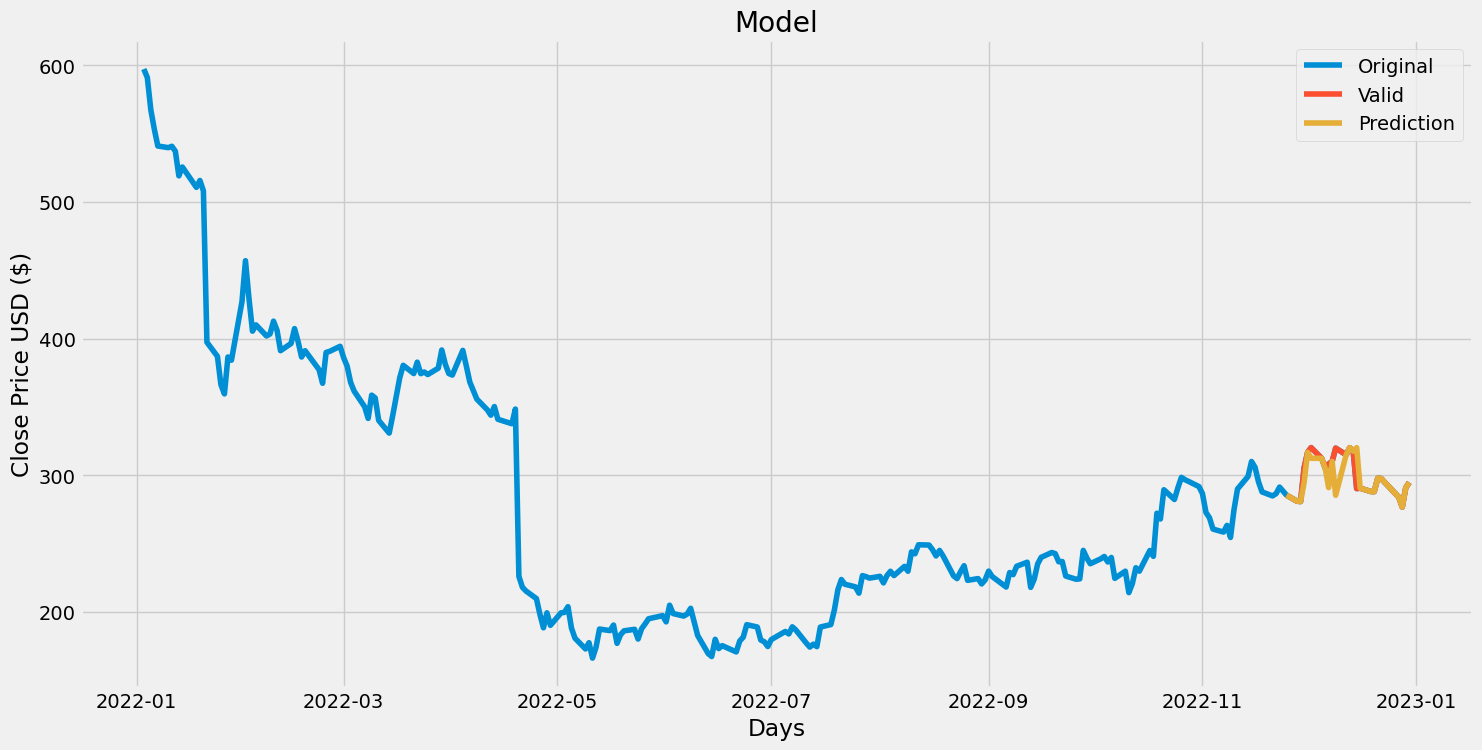

In [13]:
# visual the data
predictions = tree_pred

valid = data[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Valid Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Valid','Prediction'])

plt.show()

C:\Users\Judie Baker\AppData\Local\Temp\ipykernel_81152\228460105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


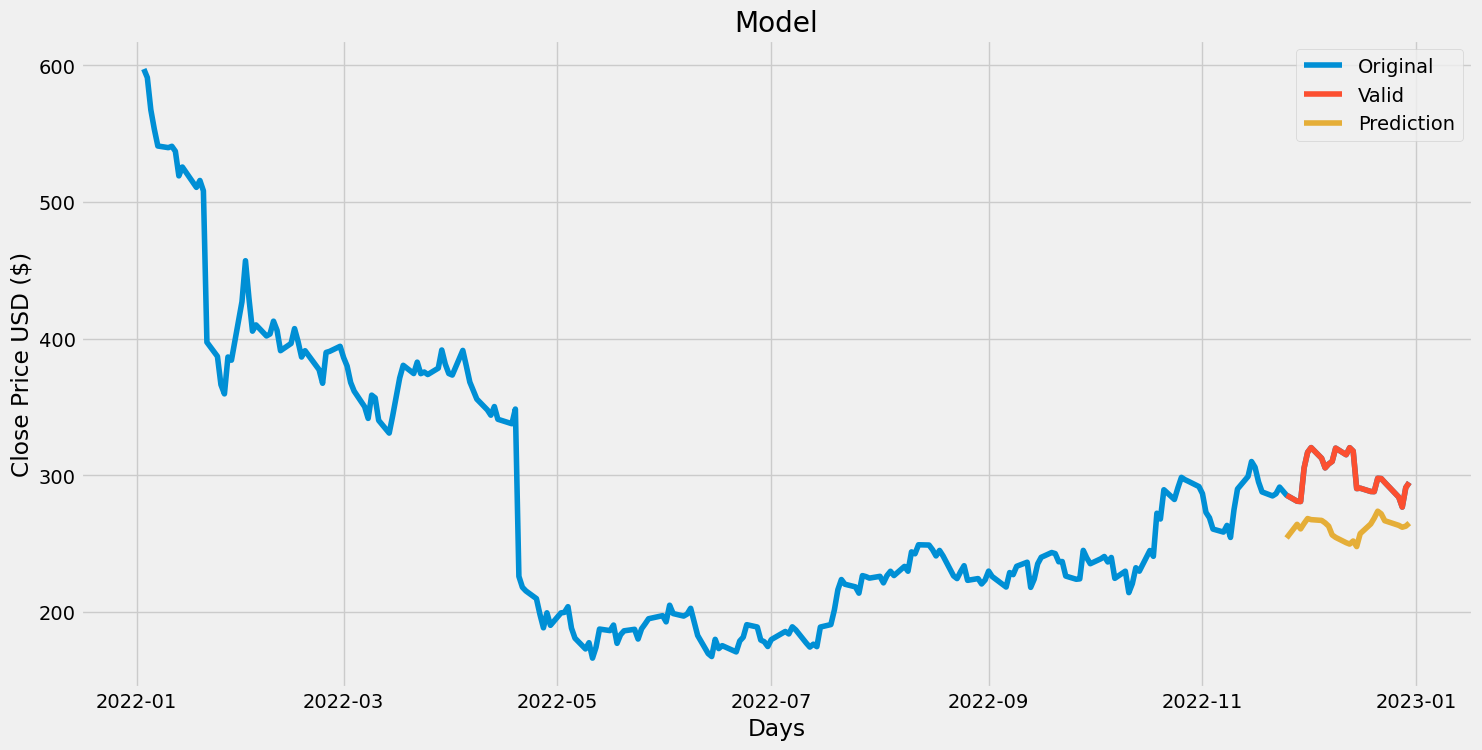

In [14]:
# visual the data
predictions = lr_pred

valid = data[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Valid','Prediction'])

plt.show()

In [ ]:
recommend = TA_Handler(symbol = ticker, screnner='america', exchange = 'NASDAQ', interval = Interval.INTERVAL_1_DAY)
print(recommend.get_analysis().summary())